In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from numpy import array
from numpy import asarray
from numpy import zeros

from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer

KeyboardInterrupt: 

In [ ]:
path = '/content/gdrive/MyDrive/Dataset/NLP/HW5 - Sentiment analysis/'

In [ ]:
def read_data(data_path, name):
    with open(data_path + name, mode='r') as file_in:
        my_dict = {}
        labels = []
        lines = []
        for line in file_in:
            labels.append(int(line[0]))
            lines.append(line[2:].lower())
        #my_dict['label'] = labels
        #my_dict['text'] = lines
    return lines, labels

In [ ]:
X_tr, y_tr = read_data(path, 'train.txt')
len(X_tr), len(y_tr)

(6920, 6920)

In [ ]:
X_te, y_te = read_data(path, 'dev.txt')
len(X_te), len(y_te)

(872, 872)

In [ ]:
# Import pandas library
import pandas as pd
 
# initialise data of lists.
data = {'review': X_tr,
        'sentiment': y_tr}
 
# Create DataFrame
movie_review = pd.DataFrame(data)
 
# Print the output.
movie_review

,review,sentiment
0,the rock is destined to be the 21st century 's...,1
1,the gorgeously elaborate continuation of `` th...,1
2,singer\/composer bryan adams contributes a sle...,1
3,yet the act is still charming here .\n,1
4,whether or not you 're enlightened by any of d...,1
...,...,...
6915,a real snooze .\n,0
6916,no surprises .\n,0
6917,we 've seen the hippie-turned-yuppie plot befo...,1
6918,her fans walked out muttering words like `` ho...,0


In [ ]:
movie_review.isnull().values.any()

False

In [ ]:
movie_review.shape

(6920, 2)

In [ ]:
movie_review['review'][2]

'singer\\/composer bryan adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .\n'

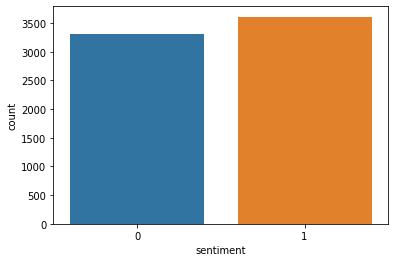

In [ ]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_review)

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
    
def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

In [ ]:
X = []
sentences = list(movie_review['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X[2]

'singer composer bryan adams contributes slew of songs few potential hits few more simply intrusive to the story but the whole package certainly captures the intended er spirit of the piece '

In [ ]:
y = movie_review['sentiment']

y = np.array(list(map(lambda x: 1 if x==1 else 0, y)))

In [ ]:
X_test, y_test = X_te, np.array(y_te)

In [ ]:
len(X_test), len(y_test), type(X_test), type(y_test)

(872, 872, list, numpy.ndarray)

In [ ]:
X_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
len(X_train), len(y_train), type(X_train), type(y_train), len(x_val), len(y_val), type(x_val), type(y_val)

(5536, 5536, list, numpy.ndarray, 1384, 1384, list, numpy.ndarray)

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
x_val = tokenizer.texts_to_sequences(x_val)

In [ ]:
X_train[0]

[1,
 146,
 27,
 170,
 3063,
 32,
 4140,
 3064,
 2,
 1,
 511,
 1999,
 3065,
 29,
 30,
 8,
 449,
 11,
 749,
 1033]

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 1000

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
x_val = pad_sequences(x_val, padding='post', maxlen=maxlen)

In [ ]:
embeddings_dictionary300 = dict()
glove_file = open('/content/gdrive/MyDrive/Dataset/NLP/HW5 - Sentiment analysis/glove.6B.300d-relativized.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions300 = asarray(records[1:], dtype='float32')
    embeddings_dictionary300 [word] = vector_dimensions300
glove_file.close()

In [ ]:
embedding_matrix300 = zeros((vocab_size, 300))
embedding_dim300 = 300
for word, index in tokenizer.word_index.items():
    embedding_vector300 = embeddings_dictionary300.get(word)
    if embedding_vector300 is not None:
        embedding_matrix300[index] = embedding_vector300

In [ ]:
ffnn300 = Sequential()
embedding_layer = Embedding(vocab_size, embedding_dim300, weights=[embedding_matrix300], input_length=maxlen)
ffnn300.add(embedding_layer)
ffnn300.add(Dense(512, activation='relu'))
ffnn300.add(Dense(256, activation='relu'))
ffnn300.add(Dense(128, activation='relu'))
ffnn300.add(Dense(64, activation='relu'))
ffnn300.add(Flatten())
ffnn300.add(Dense(1, activation='sigmoid'))

In [ ]:
ffnn300.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ffnn300.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 300)         3670200   
_________________________________________________________________
dense (Dense)                (None, 1000, 512)         154112    
_________________________________________________________________
dense_1 (Dense)              (None, 1000, 256)         131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1000, 128)         32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1000, 64)          8256      
_________________________________________________________________
flatten (Flatten)            (None, 64000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [ ]:
history = ffnn300.fit(X_train, y_train,
                    batch_size=64,
                    epochs=3,
                    verbose=1,
                    shuffle=True,
                    validation_data=(x_val, y_val))

Epoch 1/3
87/87 [==============================] - 25s 111ms/step - loss: 0.6512 - accuracy: 0.5904 - val_loss: 0.5423 - val_accuracy: 0.7327
Epoch 2/3
87/87 [==============================] - 9s 100ms/step - loss: 0.3763 - accuracy: 0.8340 - val_loss: 0.4340 - val_accuracy: 0.7962
Epoch 3/3
87/87 [==============================] - 9s 100ms/step - loss: 0.2109 - accuracy: 0.9180 - val_loss: 0.4808 - val_accuracy: 0.8049


In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
loss, accuracy = ffnn300.evaluate(X_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))

173/173 [==============================] - 3s 16ms/step - loss: 0.1117 - accuracy: 0.9666
Training Accuracy: 0.9666


In [ ]:
loss, accuracy = ffnn300.evaluate(X_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

28/28 [==============================] - 1s 19ms/step - loss: 0.5186 - accuracy: 0.8096
Testing Accuracy:  0.8096


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
embeddings_dictionary50 = dict()
glove_file = open('/content/gdrive/MyDrive/Dataset/NLP/HW5 - Sentiment analysis/glove.6B.50d-relativized.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions50 = asarray(records[1:], dtype='float32')
    embeddings_dictionary50 [word] = vector_dimensions50
glove_file.close()

In [ ]:
embedding_matrix50 = zeros((vocab_size, 50))
embedding_dim50 = 50
for word, index in tokenizer.word_index.items():
    embedding_vector50 = embeddings_dictionary50.get(word)
    if embedding_vector50 is not None:
        embedding_matrix50[index] = embedding_vector50

In [ ]:
ffnn50 = Sequential()
embedding_layer = Embedding(vocab_size, embedding_dim50, weights=[embedding_matrix50], input_length=maxlen)
ffnn50.add(embedding_layer)
ffnn50.add(Dense(512, activation='relu'))
ffnn50.add(Dense(256, activation='relu'))
ffnn50.add(Dense(128, activation='relu'))
ffnn50.add(Dense(64, activation='relu'))
ffnn50.add(Flatten())
ffnn50.add(Dense(1, activation='sigmoid'))

In [ ]:
ffnn50.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ffnn50.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 50)          611700    
_________________________________________________________________
dense (Dense)                (None, 1000, 512)         26112     
_________________________________________________________________
dense_1 (Dense)              (None, 1000, 256)         131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1000, 128)         32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1000, 64)          8256      
_________________________________________________________________
flatten (Flatten)            (None, 64000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6

In [ ]:
history = ffnn50.fit(X_train, y_train,
                    batch_size=64,
                    epochs=3,
                    verbose=1,
                    shuffle=True,
                    validation_data=(x_val, y_val))

Epoch 1/3
87/87 [==============================] - 5s 48ms/step - loss: 0.6573 - accuracy: 0.5955 - val_loss: 0.5375 - val_accuracy: 0.7312
Epoch 2/3
87/87 [==============================] - 4s 43ms/step - loss: 0.4542 - accuracy: 0.7751 - val_loss: 0.4897 - val_accuracy: 0.7688
Epoch 3/3
87/87 [==============================] - 4s 43ms/step - loss: 0.3599 - accuracy: 0.8323 - val_loss: 0.4662 - val_accuracy: 0.7789


In [ ]:
loss, accuracy = ffnn50.evaluate(X_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))

173/173 [==============================] - 2s 8ms/step - loss: 0.2647 - accuracy: 0.9008
Training Accuracy: 0.9008


In [ ]:
loss, accuracy = ffnn50.evaluate(X_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

28/28 [==============================] - 0s 9ms/step - loss: 0.4690 - accuracy: 0.7890
Testing Accuracy:  0.7890


# Bidirectional LSTM 

In [ ]:
X_test, y_test = X_te, np.array(y_te)

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.models import Sequential
from keras import layers
from keras import regularizers

In [ ]:
lstm = Sequential()
# embedding_layer = Embedding(vocab_size, embedding_dim300, weights=[embedding_matrix300], input_length=maxlen, trainable=False)
embedding_layer = Embedding(vocab_size, embedding_dim300, weights=[embedding_matrix300], input_length=maxlen)
lstm.add(embedding_layer)
lstm.add(layers.Bidirectional(layers.LSTM(units=64, dropout=0.6)))
lstm.add(Dense(64, activation='relu'))
lstm.add(Dropout(0.5))
lstm.add(Dense(1, activation='sigmoid'))

lstm.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
lstm.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_32 (ModuleWra (None, 1000, 300)         3670200   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 128)               186880    
_________________________________________________________________
module_wrapper_33 (ModuleWra (None, 64)                8256      
_________________________________________________________________
module_wrapper_34 (ModuleWra (None, 64)                0         
_________________________________________________________________
module_wrapper_35 (ModuleWra (None, 1)                 65        
Total params: 3,865,401
Trainable params: 3,865,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit network
history = lstm.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    shuffle=True,
                    validation_data=(x_val, y_val))

Epoch 1/10
87/87 [==============================] - 35s 153ms/step - loss: 0.6636 - accuracy: 0.5837 - val_loss: 0.5575 - val_accuracy: 0.7103
Epoch 2/10
87/87 [==============================] - 12s 142ms/step - loss: 0.5266 - accuracy: 0.7420 - val_loss: 0.4619 - val_accuracy: 0.7811
Epoch 3/10
87/87 [==============================] - 12s 142ms/step - loss: 0.4506 - accuracy: 0.7945 - val_loss: 0.4553 - val_accuracy: 0.7854
Epoch 4/10
87/87 [==============================] - 12s 143ms/step - loss: 0.4236 - accuracy: 0.8091 - val_loss: 0.4807 - val_accuracy: 0.7977
Epoch 5/10
87/87 [==============================] - 12s 143ms/step - loss: 0.3526 - accuracy: 0.8447 - val_loss: 0.5607 - val_accuracy: 0.7717
Epoch 6/10
87/87 [==============================] - 12s 141ms/step - loss: 0.3416 - accuracy: 0.8594 - val_loss: 0.4283 - val_accuracy: 0.8078
Epoch 7/10
87/87 [==============================] - 12s 141ms/step - loss: 0.2992 - accuracy: 0.8785 - val_loss: 0.5602 - val_accuracy: 0.7868

In [ ]:
loss, accuracy = lstm.evaluate(X_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))

173/173 [==============================] - 7s 35ms/step - loss: 0.1541 - accuracy: 0.9408
Training Accuracy: 0.9408


In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
loss, accuracy = lstm.evaluate(X_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

28/28 [==============================] - 1s 41ms/step - loss: 0.4415 - accuracy: 0.8188
Testing Accuracy:  0.8188


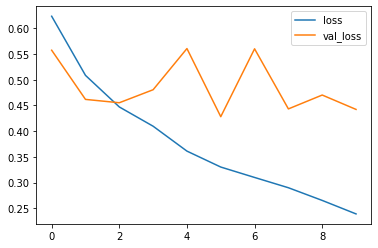

In [ ]:
model_loss_history = pd.DataFrame({'loss': history.history['loss'],
                                   'val_loss': history.history['val_loss']})
model_loss_history.plot()

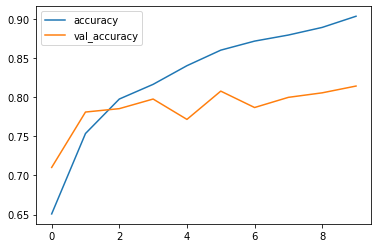

In [ ]:
model_accuracy_history = pd.DataFrame({'accuracy': history.history['accuracy'],
                                       'val_accuracy': history.history['val_accuracy']})
model_accuracy_history.plot()

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
lstm2 = Sequential()
# embedding_layer = Embedding(vocab_size, embedding_dim300, weights=[embedding_matrix300], input_length=maxlen, trainable=False)
embedding_layer = Embedding(vocab_size, embedding_dim50, weights=[embedding_matrix50], input_length=maxlen)
lstm2.add(embedding_layer)
lstm2.add(layers.Bidirectional(layers.LSTM(units=64, dropout=0.6)))
lstm2.add(Dense(64, activation='relu'))
lstm2.add(Dropout(0.5))

lstm2.add(Dense(1, activation='sigmoid'))

lstm2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
lstm2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_4 (ModuleWrap (None, 1000, 50)          611700    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               58880     
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 64)                8256      
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 64)                0         
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 1)                 65        
Total params: 678,901
Trainable params: 678,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit network
history = lstm2.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    shuffle=True,
                    validation_data=(x_val, y_val))

Epoch 1/10
87/87 [==============================] - 13s 93ms/step - loss: 0.6821 - accuracy: 0.5521 - val_loss: 0.6250 - val_accuracy: 0.6640
Epoch 2/10
87/87 [==============================] - 7s 80ms/step - loss: 0.6166 - accuracy: 0.6698 - val_loss: 0.5752 - val_accuracy: 0.6908
Epoch 3/10
87/87 [==============================] - 7s 81ms/step - loss: 0.5871 - accuracy: 0.6944 - val_loss: 0.5524 - val_accuracy: 0.7110
Epoch 4/10
87/87 [==============================] - 7s 81ms/step - loss: 0.5667 - accuracy: 0.7086 - val_loss: 0.5532 - val_accuracy: 0.7168
Epoch 5/10
87/87 [==============================] - 7s 81ms/step - loss: 0.5453 - accuracy: 0.7261 - val_loss: 0.5120 - val_accuracy: 0.7392
Epoch 6/10
87/87 [==============================] - 7s 81ms/step - loss: 0.5248 - accuracy: 0.7337 - val_loss: 0.5368 - val_accuracy: 0.7384
Epoch 7/10
87/87 [==============================] - 7s 81ms/step - loss: 0.4955 - accuracy: 0.7658 - val_loss: 0.5087 - val_accuracy: 0.7507
Epoch 8/10
8

In [ ]:
loss, accuracy = lstm2.evaluate(X_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))

173/173 [==============================] - 5s 26ms/step - loss: 0.3624 - accuracy: 0.8499
Training Accuracy: 0.8499


In [ ]:
loss, accuracy = lstm2.evaluate(X_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

28/28 [==============================] - 1s 30ms/step - loss: 0.4420 - accuracy: 0.7833
Testing Accuracy:  0.7833


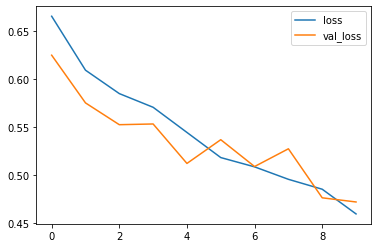

In [ ]:
model_loss_history = pd.DataFrame({'loss': history.history['loss'],
                                   'val_loss': history.history['val_loss']})
model_loss_history.plot()

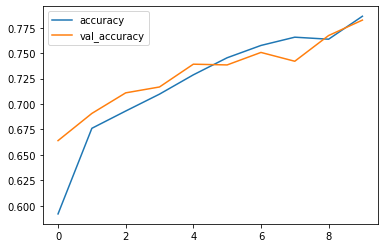

In [ ]:
model_accuracy_history = pd.DataFrame({'accuracy': history.history['accuracy'],
                                       'val_accuracy': history.history['val_accuracy']})
model_accuracy_history.plot()